In [1]:
from google.colab import files
uploaded = files.upload()

Saving data_loader.py to data_loader.py


In [2]:
import data_loader as dl
path = 'https://raw.githubusercontent.com/AliaksandrSavelyeu/HW2/main/tested.csv'
df = dl.load_csv(path)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
import matplotlib.pyplot as plt

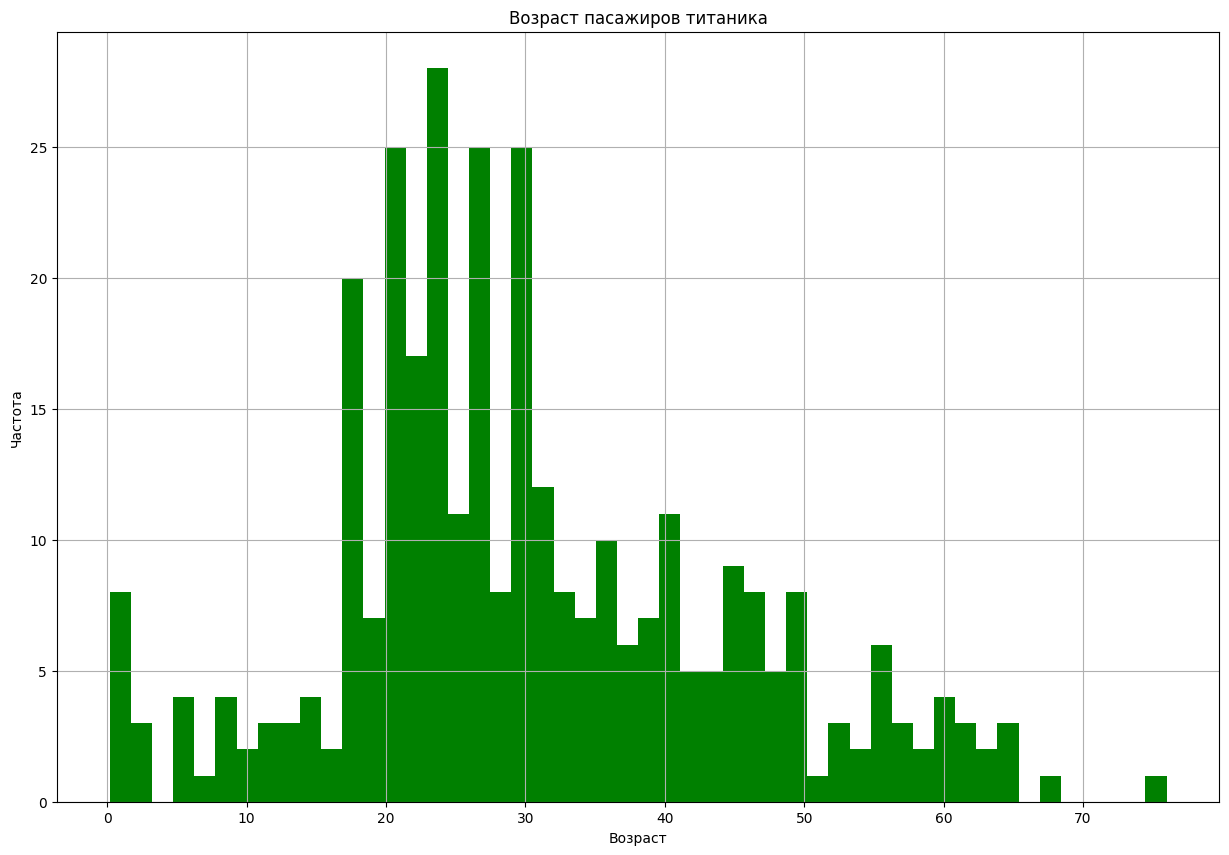

In [74]:
df['Age'].hist(bins=50, figsize=[15,10], color='green')
plt.title('Возраст пасажиров титаника')
for ax in plt.gcf().get_axes():
    ax.set_xlabel('Возраст')
    ax.set_ylabel('Частота')

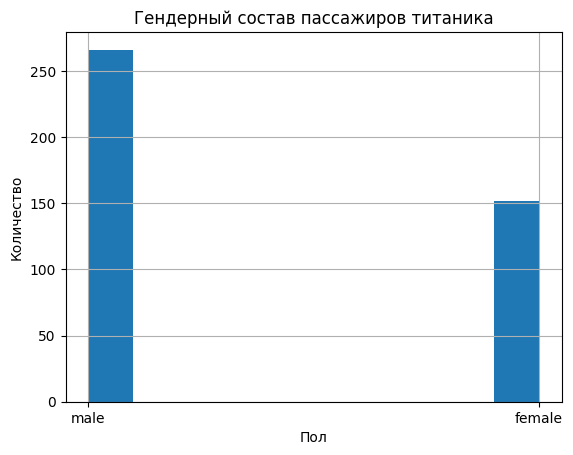

In [115]:
df['Sex'].hist()
plt.title('Гендерный состав пассажиров титаника')
for ax in plt.gcf().get_axes():
    ax.set_xlabel('Пол')
    ax.set_ylabel('Количество')

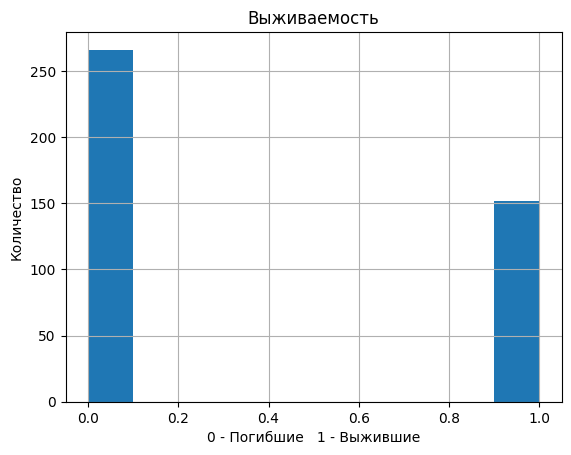

In [79]:
df['Survived'].hist()
plt.title('Выживаемость')
for ax in plt.gcf().get_axes():
    ax.set_xlabel('0 - Погибшие   1 - Выжившие')
    ax.set_ylabel('Количество')

Из графиков "гендерный состав пассажиров" и "выживаемость" видна подозрительная корреляция:количество мужчин - количество погибших, количество женщин - количество выживших. После визуализации данных графиков, перейдя в датасет, убедился что это странный титаник на котором все мужчины погибли,а женщины выжили. При выборе датасета этого не заметил.

Ниже выведен график "Распределение выживших в зависимости от пола" реализованный при помощи кода с Хабр на котором данное наблюдение представлено наглядно:


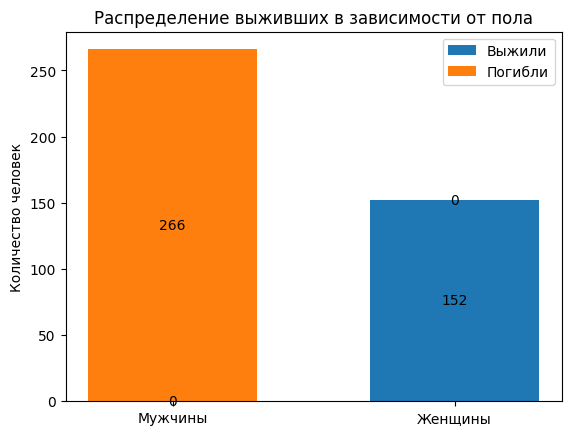

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Посчитаем общее количество мужчин и женщин, а также количество выживших
males_total = len(df.loc[(df['Sex'] == 'male')])
females_total = len(df.loc[(df['Sex'] == 'female')])
males_survived = len(df.loc[((df['Sex'] == 'male') & (df['Survived'] == 1))])
females_survived = len(df.loc[((df['Sex'] == 'female') & (df['Survived'] == 1))])

#Визуализируем
survivors_counts = {
    'Выжили': [males_survived, females_survived],
    'Погибли': [males_total-males_survived, females_total-females_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от пола')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()


Подобный график показывающий распеределение выживших в зависимости от класса каюты:

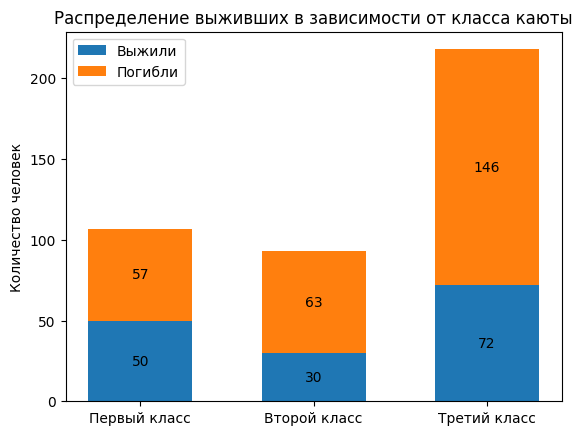

In [111]:
# Посчитаем общее количество для каждого из классов, количество выживших
first_total = len(df.loc[(df['Pclass'] == 1)])
second_total = len(df.loc[(df['Pclass'] == 2)])
third_total = len(df.loc[(df['Pclass'] == 3)])
first_survived = len(df.loc[((df['Pclass'] == 1) & (df['Survived'] == 1))])
second_survived = len(df.loc[((df['Pclass'] == 2) & (df['Survived'] == 1))])
third_survived = len(df.loc[((df['Pclass'] == 3) & (df['Survived'] == 1))])

#Визуализируем
survivors_counts = {
    'Выжили': [first_survived, second_survived, third_survived],
    'Погибли': [first_total-first_survived, second_total-second_survived, third_total-third_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

for key, count in survivors_counts.items():
    p = ax.bar(('Первый класс', 'Второй класс', 'Третий класс'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от класса каюты')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

Text(0.5, 1.0, 'Распределение пассажиров по классам в зависимости от возраста')

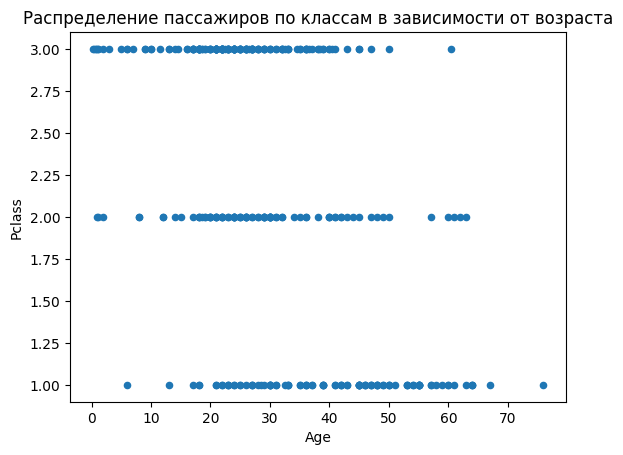

In [127]:
df.plot(kind='scatter', x='Age', y='Pclass')
plt.title('Распределение пассажиров по классам в зависимости от возраста')

Text(0.5, 1.0, 'Класса пассажира от стоимости билета')

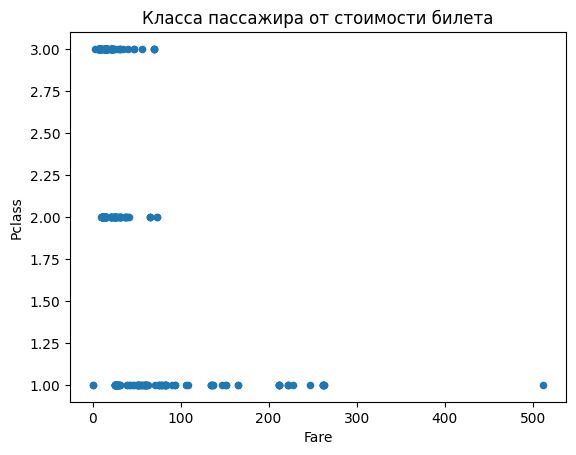

In [143]:
df.plot(kind='scatter', x='Fare', y='Pclass')
plt.title('Класса пассажира от стоимости билета')

Text(0.5, 1.0, 'Зависимость порта отправления пассажира от возраста пассажира')

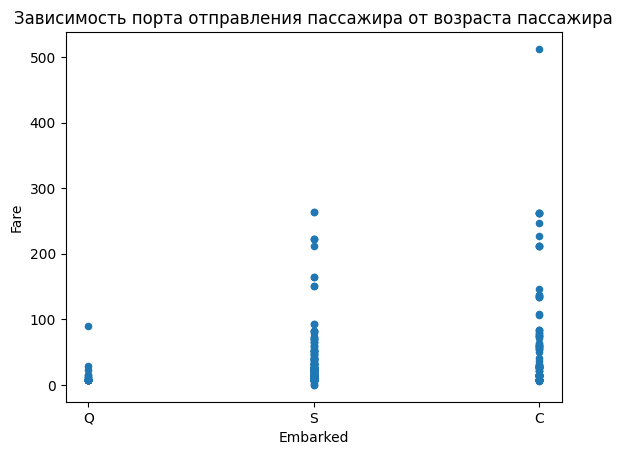

In [141]:
df.plot(kind='scatter', x='Embarked', y='Fare')
plt.title('Зависимость Стоимость билета/порт отправления')

Выводим количество пропущенных значений в каждой колонке:

In [146]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Замена пропущенных значений возраста на среднее значение:

In [150]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

Вновь выводим данные о пропущенных значениях:

In [151]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Замена пропущенных данных о стоимости билета на наиболее встречающееся значение:

In [152]:
mode_fare = df['Fare'].mode()[0]
df['Fare'].fillna(mode_fare, inplace=True)

Вновь выводим данные о пропущенных значениях:

In [153]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Колонку 'Cabin' удаляем, т.к. большое количество значений пропущено (327 из 418):

In [ ]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [163]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
